**IRIS Dataset - Classification**

**Importing Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [2]:
dataset = pd.read_csv("Iris.csv")

**Exploratory Data Analtyics**

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
dataset.shape

(150, 6)

In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
dataset.rename(columns = {'Id':'Id','SepalLengthCm':'Sep_L','SepalWidthCm':'Sep_W','PetalLengthCm':'Pet_L','PetalWidthCm':'Pet_W','Species':'Class'}, inplace= True)

In [9]:
dataset['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
dataset['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

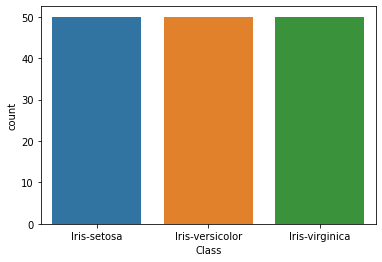

In [11]:
sns.countplot(data = dataset, x = 'Class')

In [12]:
dataset.groupby('Class').mean()

,Id,Sep_L,Sep_W,Pet_L,Pet_W
Class,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [13]:
print('Is there any missing values in this dataset?',dataset.isna().sum())

Is there any missing values in this dataset? Id       0
Sep_L    0
Sep_W    0
Pet_L    0
Pet_W    0
Class    0
dtype: int64


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      150 non-null    int64  
 1   Sep_L   150 non-null    float64
 2   Sep_W   150 non-null    float64
 3   Pet_L   150 non-null    float64
 4   Pet_W   150 non-null    float64
 5   Class   150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79409004e0>,
      dtype=object)

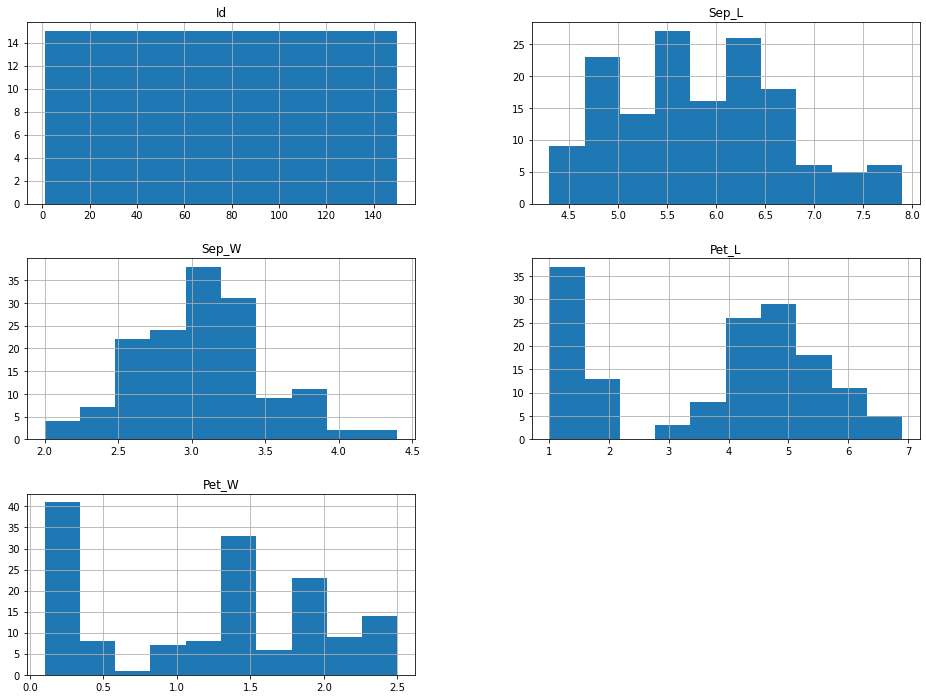

In [15]:
dataset.hist(bins=10, figsize=(16,12))

In [16]:
dataset.corr()

,Id,Sep_L,Sep_W,Pet_L,Pet_W
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
Sep_L,0.716676,1.000000,-0.109369,0.871754,0.817954
Sep_W,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
Pet_L,0.882747,0.871754,-0.420516,1.000000,0.962757
Pet_W,0.899759,0.817954,-0.356544,0.962757,1.000000


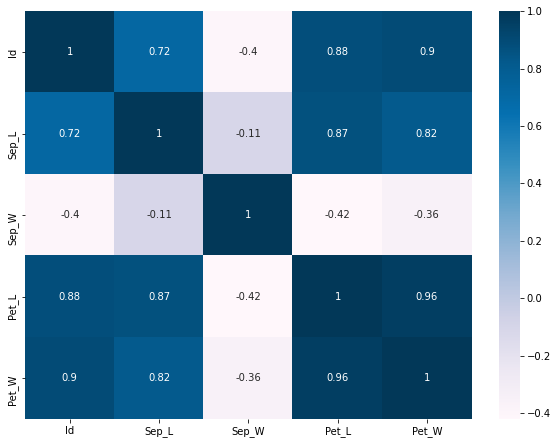

In [17]:
plt.figure(figsize=(10,7.5))
sns.heatmap(dataset.corr(), annot=True, cmap='PuBu')

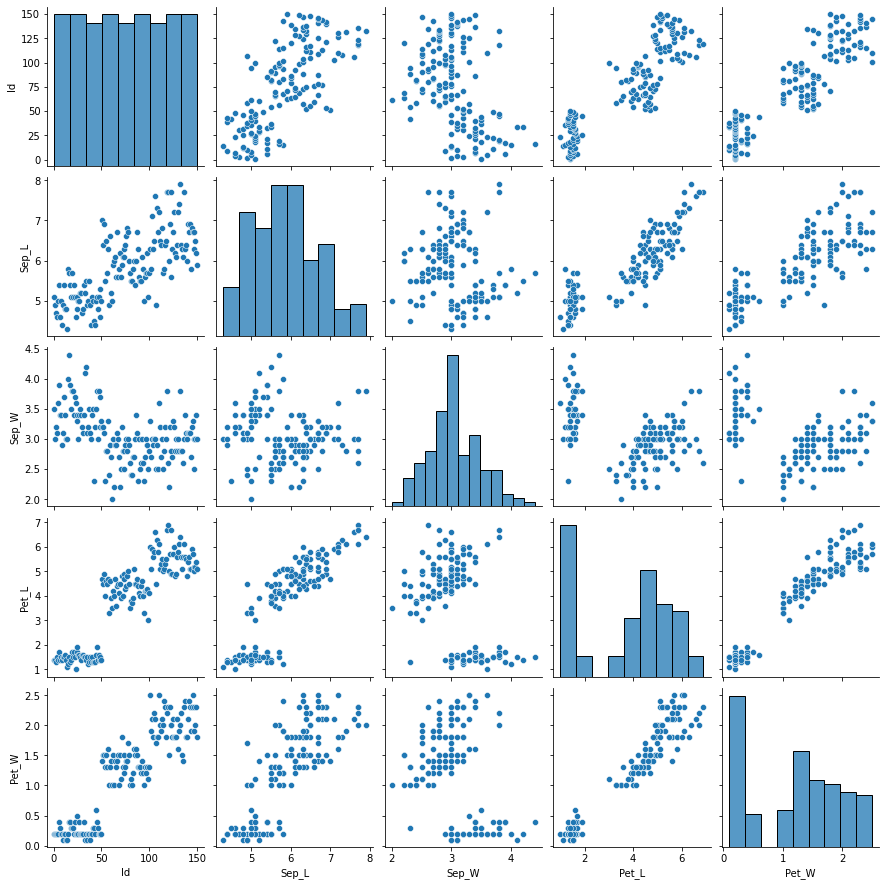

In [18]:
sns.pairplot(dataset)

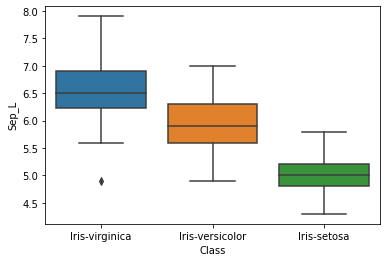

In [19]:
sns.boxplot(x='Class',y='Sep_L', data=dataset, order=['Iris-virginica','Iris-versicolor','Iris-setosa'])

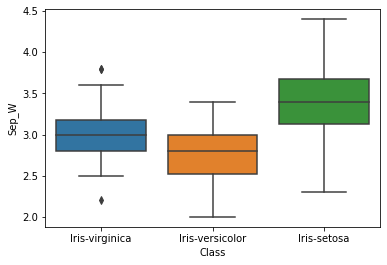

In [20]:
sns.boxplot(x='Class',y='Sep_W', data=dataset, order=['Iris-virginica','Iris-versicolor','Iris-setosa'])

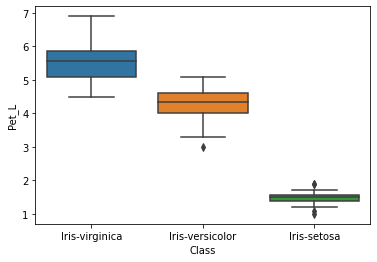

In [21]:
sns.boxplot(x='Class',y='Pet_L', data=dataset, order=['Iris-virginica','Iris-versicolor','Iris-setosa'])

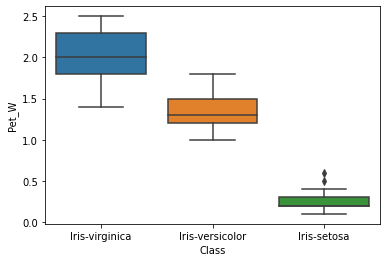

In [22]:
sns.boxplot(x='Class',y='Pet_W', data=dataset, order=['Iris-virginica','Iris-versicolor','Iris-setosa'])

**Data Preprocessing**

In [23]:
X = dataset.iloc[:,1:-1].values  #Id column not included
y = dataset.iloc[:,-1].values

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

**Train - Test Splitup**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('Splitted Train-Test dataset details:')
print('Num of dataset in X -Train:', np.shape(X_train))
print('Num of dataset in Y -Train:', np.shape(y_train))
print('Num of dataset in X -Test:', np.shape(X_test))
print('Num of dataset in y -Test:', np.shape(y_test))

Splitted Train-Test dataset details:
Num of dataset in X -Train: (112, 4)
Num of dataset in Y -Train: (112,)
Num of dataset in X -Test: (38, 4)
Num of dataset in y -Test: (38,)


**Algotithm Setup, Model Fitting, Prediction & Evaluation**

**K Nearest Neighbour Classification**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
class_knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
class_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
y_pred1 = class_knn.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred1)
print(cm_knn)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [29]:
from sklearn.metrics import accuracy_score
knn = accuracy_score(y_test, y_pred1)
print('Accuracy for K Nearest Neighbour Classifier:',knn)

Accuracy for K Nearest Neighbour Classifier: 0.9736842105263158


In [30]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred1, average='macro')

0.9666666666666667

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



**Support Vector Machine**

In [32]:
from sklearn.svm import SVC
class_svm_linear = SVC(kernel = 'linear', random_state = 0)
class_svm_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
y_pred2 = class_svm_linear.predict(X_test)

In [34]:
cm_svm = confusion_matrix(y_test, y_pred2)
print(cm_svm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [35]:
svm_linear = accuracy_score(y_test, y_pred2)
print('Accuracy for Support Vector Machine Classifier (Linear):',svm_linear)

Accuracy for Support Vector Machine Classifier (Linear): 0.9736842105263158


In [36]:
precision_score(y_test, y_pred2, average='macro')

0.9666666666666667

In [37]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [38]:
from sklearn.svm import SVC
class_svm_rbf = SVC(kernel = 'rbf', random_state = 0)
class_svm_rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [39]:
y_pred3 = class_svm_rbf.predict(X_test)

In [40]:
cm_svm_rbf = confusion_matrix(y_test, y_pred3)
print(cm_svm_rbf)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [41]:
svm_linear_rbf = accuracy_score(y_test, y_pred2)
print('Accuracy for Support Vector Machine Classifier (RBF):',svm_linear_rbf)

Accuracy for Support Vector Machine Classifier (RBF): 0.9736842105263158


In [42]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [43]:
from sklearn.svm import SVC
class_svm_poly = SVC(kernel = 'poly', degree = 3, random_state = 0)
class_svm_poly.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
y_pred4 = class_svm_poly.predict(X_test)

In [45]:
cm_svm_poly = confusion_matrix(y_test, y_pred4)
print(cm_svm_poly)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [46]:
svm_linear_poly = accuracy_score(y_test, y_pred4)
print('Accuracy for Support Vector Machine Classifier (Polynomial):',svm_linear_poly)

Accuracy for Support Vector Machine Classifier (Polynomial): 0.9736842105263158


In [47]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [48]:
class_svm_sig = SVC(kernel = 'sigmoid', random_state = 0)
class_svm_sig.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [49]:
y_pred5 = class_svm_sig.predict(X_test)

In [50]:
cm_svm_sig = confusion_matrix(y_test, y_pred5)
print(cm_svm_sig)

[[ 0  0 13]
 [ 0  0 16]
 [ 0  0  9]]


In [51]:
svm_linear_sig = accuracy_score(y_test, y_pred5)
print('Accuracy for Support Vector Machine Classifier (Sigmoid):',svm_linear_sig)

Accuracy for Support Vector Machine Classifier (Sigmoid): 0.23684210526315788


In [52]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        16
           2       0.24      1.00      0.38         9

    accuracy                           0.24        38
   macro avg       0.08      0.33      0.13        38
weighted avg       0.06      0.24      0.09        38



**Naiye Bayes Classifier**

In [53]:
from sklearn.naive_bayes import GaussianNB
class_nb = GaussianNB()
class_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
y_pred6 = class_nb.predict(X_test)

In [55]:
cm_nb = confusion_matrix(y_test, y_pred6)
print(cm_nb)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [56]:
nb = accuracy_score(y_test, y_pred6)
print('Accuracy for Naive Bayes Classifier:',nb)

Accuracy for Naive Bayes Classifier: 1.0


In [57]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



**Decision Tree**

In [58]:
from sklearn.tree import DecisionTreeClassifier
class_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
class_dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [59]:
y_pred7 = class_dtc.predict(X_test)

In [60]:
cm_dtc = confusion_matrix(y_test, y_pred7)
print(cm_dtc)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [61]:
dtc = accuracy_score(y_test, y_pred7)
print('Accuracy for Decision Tree Classifier:',dtc)

Accuracy for Decision Tree Classifier: 0.9736842105263158


In [62]:
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



**Random Forest**

In [63]:
from sklearn.ensemble import RandomForestClassifier
class_rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
class_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [64]:
y_pred8 = class_rfc.predict(X_test)

In [65]:
cm_rfc = confusion_matrix(y_test, y_pred8)
print(cm_rfc)

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


In [66]:
rfc = accuracy_score(y_test, y_pred8)
print('Accuracy for Random Forest Classifier:',rfc)

Accuracy for Random Forest Classifier: 0.9473684210526315


In [67]:
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



****

**Logistic Regression**

In [68]:
from sklearn.linear_model import LogisticRegression
class_lr = LogisticRegression(random_state=0)
class_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred9 = class_lr.predict(X_test)

In [70]:
cm_lr = confusion_matrix(y_test, y_pred9)
print(cm_lr)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [71]:
lr = accuracy_score(y_test, y_pred9)
print('Accuracy for Logistic Regression Classifier:',lr)

Accuracy for Logistic Regression Classifier: 0.9736842105263158


In [72]:
print(classification_report(y_test, y_pred9))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

